# Tara Chl Outliers

In [1]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.tara import io as tara_io
from oceancolor.ph import pigments
from oceancolor.hydrolight import loisel23
from oceancolor.utils import cat_utils

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

# Load

## NMF

In [2]:
nmf_fit = 'Tara'
N_NMF, iop = 4, 'a'
d = cnmf_io.load_nmf(nmf_fit, N_NMF, iop)
M = d['M']
coeff = d['coeff']
NMF_wave = d['wave']

Loading: /home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/Tara/Tara_NMF_04_a.npz


In [13]:
list(d.keys())

['M', 'coeff', 'spec', 'mask', 'err', 'wave', 'Rs', 'UID']

## Full

In [3]:
tara_db = tara_io.load_pg_db(expedition='Microbiome')

Reading: /home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/data/Tara/merged_tara_pacific_microbiome_acs_160124.feather


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/io.py:83: UserWarning: Duplicate times in Tara Oceans database
  warnings.warn("Duplicate times in Tara Oceans database")


Using bit_flags removes 127034 rows of a total 774298


# Chl

In [5]:
NMF_chl = coeff[:,1] 

In [7]:
midx = cat_utils.match_ids(d['UID'], tara_db.uid.values)
Tara_chlA = tara_db.Chl_lineheight.values[midx]    

# Outliers

In [8]:
out = (NMF_chl > 2.) & (Tara_chlA < 0.5)
np.sum(out)

84

## Examine one

In [9]:
all_idx = np.where(out)[0]
idx = all_idx[0]

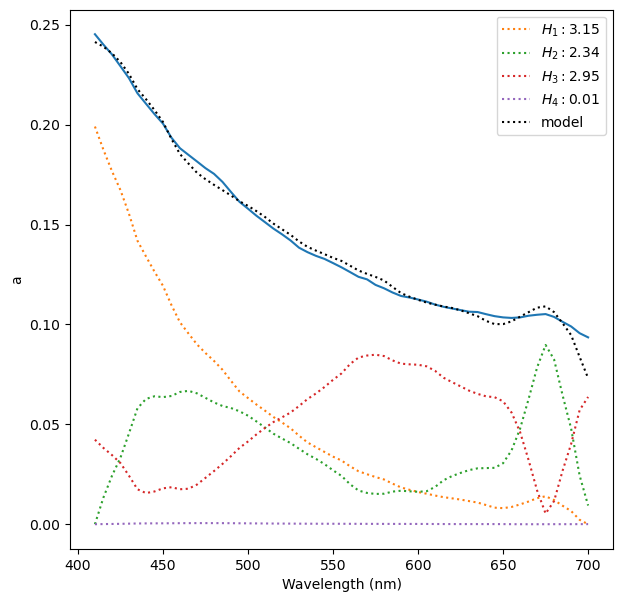

In [17]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

# True
ax.plot(d['wave'], d['spec'][idx])
model = np.zeros_like(d['wave'])
# Break it down
for ss in range(d['M'].shape[0]):
    ax.plot(d['wave'], d['M'][ss]*d['coeff'][idx][ss], 
        label=r'$H_'+f'{ss+1}: {d["coeff"][idx][ss]:0.2f}'+'$', ls=':')
    #
    model += d['M'][ss]*d['coeff'][idx][ss]
ax.plot(d['wave'], model, 'k:', label='model')
ax.legend()
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('a')
#
plt.show()